In [0]:
# ASSIGNMENT 5

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.activations import relu

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


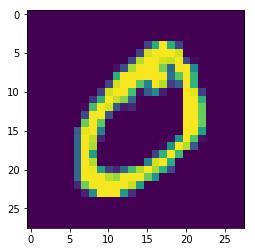

In [36]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [40]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
datagen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)

datagen.fit(X_train)
train_iterator = datagen.flow(X_train, Y_train, batch_size=128)
val_iterator = datagen.flow(X_test, Y_test, batch_size=128)

In [9]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

W0622 18:28:33.507200 140193449035648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0622 18:28:33.526131 140193449035648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 18:28:33.530726 140193449035648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 18:28:33.556205 140193449035648 deprecation_wrap

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        330       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [11]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=20, verbose=1, validation_data=val_iterator, validation_steps=len(val_iterator), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)])

W0622 18:32:46.028546 140193449035648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0622 18:32:46.143184 140193449035648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 15s 32ms/step - loss: 0.5274 - acc: 0.8517 - val_loss: 0.1004 - val_acc: 0.9810
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 10s 22ms/step - loss: 0.2495 - acc: 0.9280 - val_loss: 0.0682 - val_acc: 0.9863
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 10s 22ms/step - loss: 0.1958 - acc: 0.9414 - val_loss: 0.0449 - val_acc: 0.9894
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 10s 22ms/step - loss: 0.1654 - acc: 0.9489 - val_loss: 0.0357 - val_acc: 0.9909
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/469 [==============================] - 10s 22ms/step - loss: 0.1504 - acc: 0.9490

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019932233119336888, 0.9947]


In [14]:
from keras.layers import Activation
model2 = Sequential()
 
model2.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Convolution2D(32, 3, 3)) #24
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Convolution2D(10, 1, 1)) #22

model2.add(MaxPooling2D(pool_size=(2, 2)))#11

model2.add(Convolution2D(16, 3, 3))#9
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))


model2.add(Convolution2D(16, 3, 3))#7
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))


model2.add(Convolution2D(16, 3, 3))#5
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))


model2.add(Convolution2D(16, 3, 3))#3
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))


model2.add(Convolution2D(10, 4, 4))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))


model2.add(Flatten())
model2.add(Activation('softmax'))


model2.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-pac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [15]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model2.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=20, verbose=1, validation_data=val_iterator, validation_steps=len(val_iterator), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 12s 26ms/step - loss: 0.6032 - acc: 0.8354 - val_loss: 0.1188 - val_acc: 0.9824
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 10s 22ms/step - loss: 0.3437 - acc: 0.8851 - val_loss: 0.0594 - val_acc: 0.9910
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 10s 22ms/step - loss: 0.3169 - acc: 0.8874 - val_loss: 0.0529 - val_acc: 0.9894
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 10s 22ms/step - loss: 0.3006 - acc: 0.8909 - val_loss: 0.0374 - val_acc: 0.9933
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/469 [==============================] - 10s 21ms/step - loss: 0.2873 - acc: 0.8944

In [17]:
from keras.regularizers import l2

from keras.layers import Activation
model3 = Sequential()
 
model3.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), activation='relu', input_shape=(28,28,1))) #26
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Convolution2D(32, 3, 3, kernel_regularizer=l2(0.01), activation='relu')) #24
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Convolution2D(10, 1, 1, activation='relu')) #22

model3.add(MaxPooling2D(pool_size=(2, 2)))#11

model3.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), activation='relu'))#9
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), activation='relu'))#7
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), activation='relu'))#5
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), activation='relu'))#3
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Convolution2D(10, 4, 4))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Flatten())
model3.add(Activation('softmax'))

model3.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regul

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        330       
__________

In [18]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model3.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=20, verbose=1, validation_data=val_iterator, validation_steps=len(val_iterator), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 13s 29ms/step - loss: 0.8116 - acc: 0.8494 - val_loss: 0.5387 - val_acc: 0.9208
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 11s 23ms/step - loss: 0.3317 - acc: 0.9210 - val_loss: 0.1590 - val_acc: 0.9804
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 10s 22ms/step - loss: 0.2752 - acc: 0.9343 - val_loss: 0.1811 - val_acc: 0.9745
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 10s 22ms/step - loss: 0.2456 - acc: 0.9394 - val_loss: 0.1345 - val_acc: 0.9819
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/469 [==============================] - 10s 22ms/step - loss: 0.2257 - acc: 0.9428

In [19]:
model_final = Sequential()
 
model_final.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), input_shape=(28,28,1))) #26
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dropout(0.1))

model_final.add(Convolution2D(32, 3, 3, kernel_regularizer=l2(0.01))) #24
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dropout(0.1))

model_final.add(Convolution2D(10, 1, 1)) #22

model_final.add(MaxPooling2D(pool_size=(2, 2)))#11

model_final.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01)))#9
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dropout(0.1))


model_final.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01)))#7
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dropout(0.1))


model_final.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01)))#5
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dropout(0.1))


model_final.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01)))#3
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dropout(0.1))


model_final.add(Convolution2D(10, 4, 4))
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dropout(0.1))


model_final.add(Flatten())
model_final.add(Activation('softmax'))


model_final.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 32)        0         
__________

In [20]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model_final.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model_final.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40, verbose=1, validation_data=val_iterator, validation_steps=len(val_iterator), 
                    callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 13s 28ms/step - loss: 0.8402 - acc: 0.8329 - val_loss: 0.3808 - val_acc: 0.9378
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 10s 21ms/step - loss: 0.4278 - acc: 0.8790 - val_loss: 0.2966 - val_acc: 0.9446
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 10s 21ms/step - loss: 0.3974 - acc: 0.8830 - val_loss: 0.1383 - val_acc: 0.9829
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 10s 21ms/step - loss: 0.3829 - acc: 0.8836 - val_loss: 0.1449 - val_acc: 0.9811
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/469 [==============================] - 10s 21ms/step - loss: 0.3639 - acc: 0.8883

In [42]:
results = model_final.evaluate_generator(val_iterator, steps=len(val_iterator), verbose=1)
print(results)

79/79 [==============================] - 1s 10ms/step
[0.04536989903151989, 0.9937]


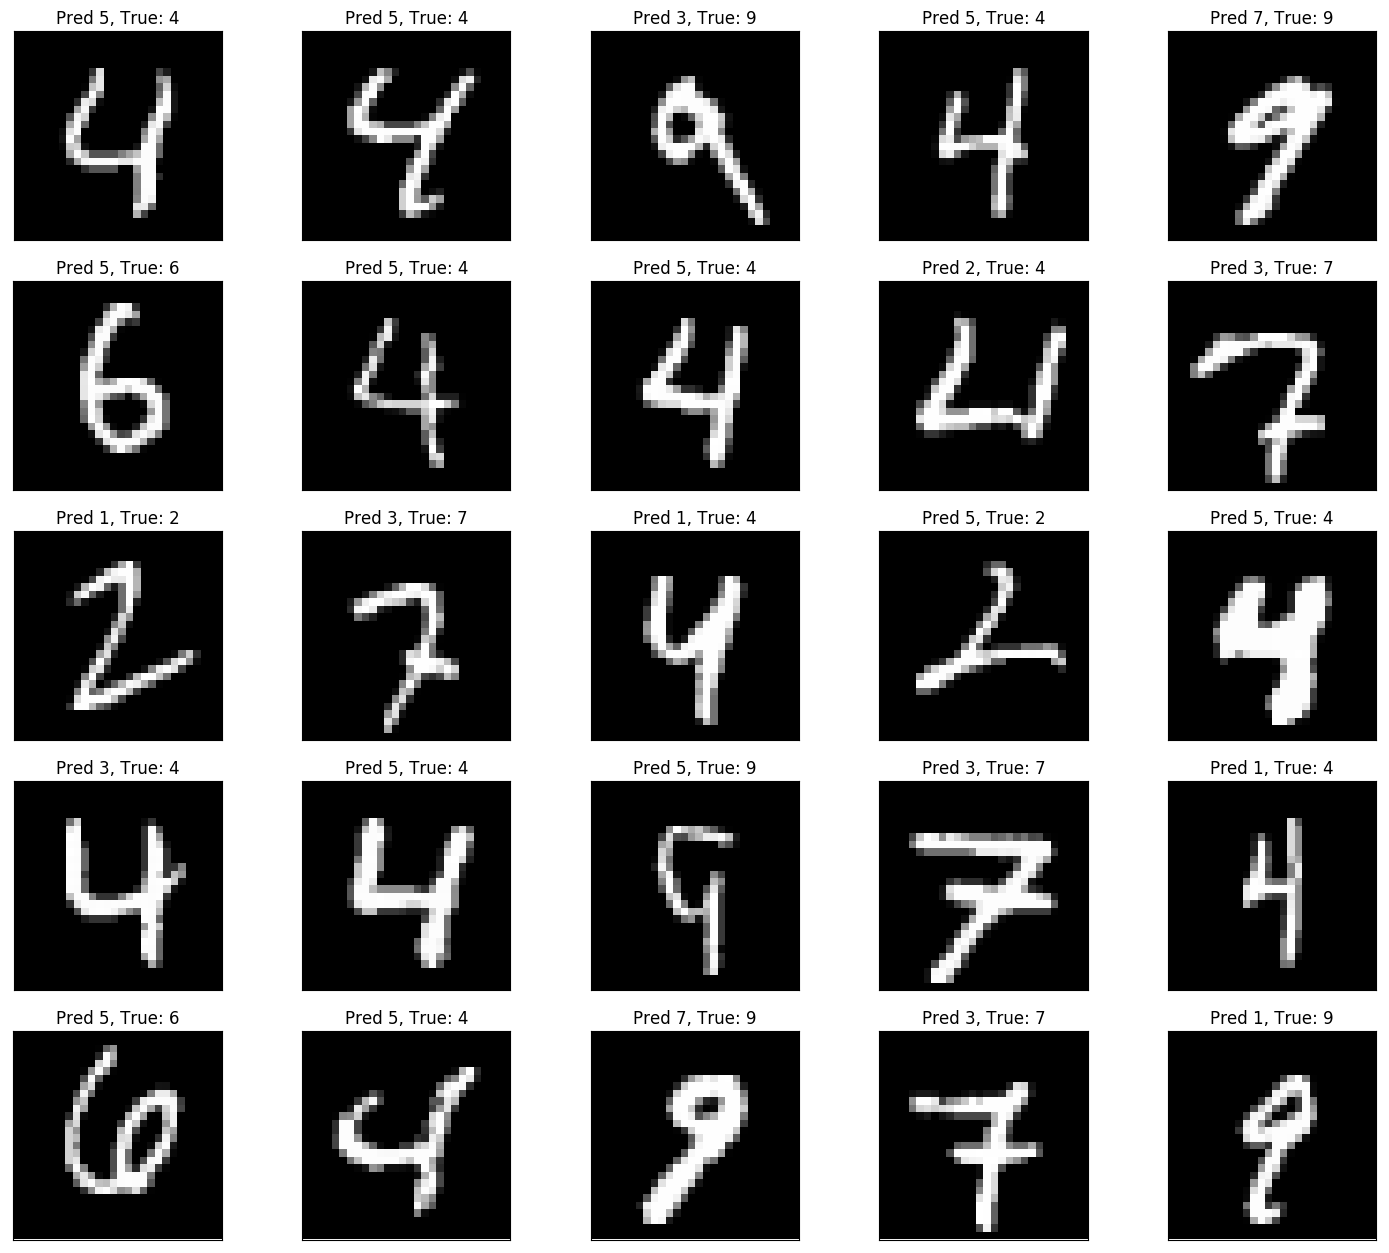

In [51]:
fig=plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')
predicted = model_final.predict_classes(X_test)
correct_indices = np.nonzero(predicted == y_test)[0]
incorrect_indices = np.nonzero(predicted != y_test)[0]

for i, incorrect in enumerate(incorrect_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Pred {}, True: {}".format(predicted[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])